In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
from pandas.tools.plotting import table


In [2]:
def person_id(dataframes):
    for df in dataframes:

        df.replace(['300.0', 300.0, '311.0', 311.0, '305.0', 305.0], ['300.00', '300.00', '311', '311', '305.00', '305.00'], inplace=True)
        df['patient_id']= df.apply(lambda df: str(df['Birth Dt']) + df['Gender Desc'] + str(df['Diag 1']), axis=1)
        # df = df.groupby('patient_id')
        df['Diag 4'] = df['Diag 4'].astype(str)
        
        df.replace(to_replace = ['296.40', '296.4', '296.41', '296.42', '296.43', '296.44', '296.45', '296.46', '296.50', '296.5', '296.51', '296.52', '296.54', '296.55', '296.56', '296.7'], value = '296.53', inplace = True)

        #replacing Major Depressive disorder
        df.replace(to_replace = ['296.20', '296.2', '296.21', '296.22', '296.23', '296.24', '296.25', '296.26', '296.30', '296.3', '296.31', '296.32', '296.34', '296.35', '296.36'], value = '296.33', inplace = True)

        #replace Alcohol disorder to include all levels in one
        df.replace(['303.90', '303.9'], value = '305.00', inplace = True)

        #replace cannabus use disorder
        df.replace(['304.30', '304.3', '305.2'], value = '305.20', inplace = True)

        #replace Phencyclidine use disorder
        df.replace(['304.60', '304.6', '305.9'], value = '305.90', inplace = True)

        #replace other hallucinogen use disorder
        df.replace(['304.50', '304.5', '305.3'], value = '305.30', inplace = True)

        #replace Opiod use disorder
        df.replace(['304.00', '304', '304.0', '305.5'], value = '305.50', inplace = True)

        #replace Sedative Hypnotic or Anxiolytic use disorder
        df.replace(['304.10', '304.1', '305.4'], value = '305.40', inplace = True)

        #replace stimulant use disorder Amphetamine-type substance/other
        df.replace(['304.4', '304.40', '305.7'], value = '305.70', inplace = True)

        #replace stimulant use disprder cocaine
        df.replace(['304.2', '304.20', '305.6'], value = '305.60', inplace = True)
        
    return df

In [3]:
def dropping_duplicates(dataframes):
    for df in dataframes:
        df = df.drop_duplicates(subset='patient_id', keep='last')
    return df

In [27]:
def given_diagnosis(df, diag1_code, df_desc):
    plt.close('all')
    df = df.loc[df['Diag 1'] == diag1_code]
    # df = df[df['Doctor_Num'] == doc_num]
    count_list= []
    df_2 = df['Diag 2'].astype(str)
    df_3 = df['Diag 3'].astype(str)
    df_4 = df['Diag 4'].astype(str)
    unique = df_2.unique()
    index = np.argwhere(unique =='nan')
    unique = np.delete(unique, index)
    for X in unique:
        count = 0
        for x in df_2:
            if X == x:
                count +=1
        for x in df_3:
            if X == x:
                count +=1
        for x in df_4:
            if X == x:
                count +=1
        count_list.append(count/len(df)*100)

    together = pd.DataFrame(
    {'code': unique,
     'count': count_list
    })
    together = together.sort_values(['count'], ascending=[False])
    #I want to exclude any counts where it was only 1 person
    together = together[together['count'] != 1/len(df)*100]


    #Grab DataFrame rows where column has certain values
    title_desc1= df_desc[df_desc['Diag 1'] == diag1_code]
    title_desc = str(list(title_desc1['Diag Desc 1']))
    title_desc = title_desc.strip("['")
    title_desc = title_desc.strip("']")

    df_desc = df_desc[df_desc['Diag 1'].isin(together['code'])]

    plt.close('all')
    #creating bar graph
    fig = together.plot(x = 'code', y = 'count', kind = 'bar', color = 'k', figsize = (8,8))
    plt.ylabel('Percent of Patients')
    plt.title('Co-morbidity for {}'.format(diag1_code))
    plt.show()


    print(df_desc)
#     
#     return (unique, together, title_desc, df_desc)

In [5]:
def plotting_graph_table(together, diag1_code, df_desc, title_desc):    
    plt.close('all')
    #creating bar graph
    fig = together.plot(x = 'code', y = 'count', kind = 'bar', color = 'r', figsize = (8,8))
    plt.ylabel('Percent of Patients')
    plt.title('Co-morbidity for {}'.format(diag1_code))
    plt.savefig('Co-morbid_{}.png'.format(diag1_code))

    plt.close('all')


    ax = plt.subplot(111, frame_on=False) # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis

    ax.table(cellText=df_desc.values, cellLoc = 'center', rowLoc = 'center',
          loc='center')
         # where df is your data frame
    # plt.title('Co-morbidity for {}'.format(title_desc))
    plt.figtext(.5,.9,'Co-morbidity for {}'.format(title_desc), fontsize=5, ha='center')

#     plt.savefig('Co-morbid_{}_table.png'.format(diag1_code),dpi=900)

    plt.show()
    print(together)

In [6]:
def table_of_codes(df):
    df_desc = df[['Diag 1','Diag Desc 1']]
    df_desc = df_desc.drop_duplicates(subset='Diag 1', keep='last')
    return df_desc

In [7]:
df_jan = pd.read_csv('../data/Chloe Jan clean.csv')
df_feb = pd.read_csv('../data/Chloe Feb clean.csv')
df_mar = pd.read_csv('../data/Chloe March clean.csv')
df_apr = pd.read_csv('../data/Chloe April clean.csv')
df_may = pd.read_csv('../data/Chloe May clean.csv')
df_jun = pd.read_csv('../data/Chloe June clean.csv')

In [8]:
dataframes = (df_jan, df_feb, df_mar, df_apr, df_may, df_jun)
person_id(dataframes)

,Doctor_Num,Loc Name,City,Zip,Gender Desc,Birth Dt,Pat Age,Pat Age in Years,Pat Age in Years (DOS),Pat Type,...,Diag Desc 1,Diag Desc 2,Diag Desc 3,Diag Desc 4,Place Of Serv,Fin Class,Admitting,Referring,Pat Sts,patient_id
0,1,SMMC Inpt,Osawatomie,66064,Female,02/14/1969,48 yrs.,48,46,Hospital,...,"Bipolar disorder, unspecified",NaN,NaN,NaN,Inpatient Hospital,Medicare,NaN,NaN,Hospital Patient,02/14/1969Female296.80
1,1,SMMC Outpt,Overland Park,66207,Female,03/30/1952,65 yrs.,65,63,Hospital,...,"Bipolar disorder, unspecified",NaN,NaN,NaN,Outpatient Hospital,Commercial,NaN,NaN,Hospital Patient,03/30/1952Female296.80
2,1,LW Psychiatry Assoc Of KC,Overland Park,66212,Female,03/30/1979,38 yrs.,38,36,Office Followup,...,Obsessive-compulsive disorders,NaN,NaN,NaN,Office,Commercial,NaN,NaN,EHR,03/30/1979Female300.3
3,1,SMMC Outpt,Olathe,66061,Female,12/02/1977,39 yrs.,39,37,Hospital,...,"Schizoaffective disorder, unspecified",NaN,NaN,NaN,Outpatient Hospital,Commercial,NaN,NaN,Pending Collections,12/02/1977Female295.70
4,1,SMMC Outpt,Peculiar,64078,Female,08/12/1952,64 yrs.,64,62,Hospital,...,"Schizoaffective disorder, unspecified",NaN,NaN,NaN,Outpatient Hospital,BCBS,NaN,NaN,EHR,08/12/1952Female295.70
5,1,SMMC Inpt,Lenexa,66215,Female,10/30/1985,31 yrs.,31,29,Hospital,...,"Other and unspecified alcohol dependence, unsp...",NaN,NaN,NaN,Inpatient Hospital,Charity,NaN,NaN,Hospital Patient,10/30/1985Female303.90
6,1,SMMC Outpt,Kansas City,64110,Male,06/19/1975,41 yrs.,41,40,Hospital,...,"Major depressive affective disorder, recurrent...",NaN,NaN,NaN,Outpatient Hospital,BCBS,NaN,NaN,Hospital Patient,06/19/1975Male296.33
7,1,SMMC Inpt,Olathe,66062,Female,12/23/1966,50 yrs.,50,48,Hospital,...,"Major depressive affective disorder, recurrent...",NaN,NaN,NaN,Inpatient Hospital,Commercial,NaN,NaN,Hospital Patient,12/23/1966Female296.33
8,1,SMMC Outpt,Stilwell,66085,Female,04/15/1976,41 yrs.,41,39,Hospital,...,"Major depressive affective disorder, recurrent...",NaN,NaN,NaN,Outpatient Hospital,BCBS,NaN,NaN,Hospital Patient,04/15/1976Female296.33
9,1,SMMC Outpt,Stilwell,66085,Female,04/15/1976,41 yrs.,41,39,Hospital,...,"Major depressive affective disorder, recurrent...",NaN,NaN,NaN,Outpatient Hospital,BCBS,NaN,NaN,Hospital Patient,04/15/1976Female296.33


In [9]:
frames = [df_jan, df_feb, df_mar,df_apr, df_may, df_jun]

df_combo = pd.concat(frames)
df_combo = df_combo.drop_duplicates(subset='patient_id', keep='last')

In [10]:
lst_codes = df_combo['Diag 1'].astype(str)

In [11]:
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19830 entries, 274 to 23980
Data columns (total 27 columns):
Doctor_Num                19830 non-null int64
Loc Name                  19830 non-null object
City                      19830 non-null object
Zip                       19830 non-null object
Gender Desc               19830 non-null object
Birth Dt                  19830 non-null object
Pat Age                   19830 non-null object
Pat Age in Years          19830 non-null int64
Pat Age in Years (DOS)    19830 non-null int64
Pat Type                  19829 non-null object
Dt of Svc                 19830 non-null object
CPT4                      19830 non-null object
CPT4 Desc                 19830 non-null object
Diag 1                    19157 non-null object
Diag 2                    6261 non-null object
Diag 3                    2202 non-null object
Diag 4                    19830 non-null object
Diag Desc 1               19130 non-null object
Diag Desc 2               6241

In [12]:
dropping_col = ['Loc Name', 'City', 'Zip', 'Pat Age', 'Referring']
df_combo = df_combo.drop((x for x in dropping_col), axis = 1)

In [13]:
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19830 entries, 274 to 23980
Data columns (total 22 columns):
Doctor_Num                19830 non-null int64
Gender Desc               19830 non-null object
Birth Dt                  19830 non-null object
Pat Age in Years          19830 non-null int64
Pat Age in Years (DOS)    19830 non-null int64
Pat Type                  19829 non-null object
Dt of Svc                 19830 non-null object
CPT4                      19830 non-null object
CPT4 Desc                 19830 non-null object
Diag 1                    19157 non-null object
Diag 2                    6261 non-null object
Diag 3                    2202 non-null object
Diag 4                    19830 non-null object
Diag Desc 1               19130 non-null object
Diag Desc 2               6241 non-null object
Diag Desc 3               2166 non-null object
Diag Desc 4               458 non-null object
Place Of Serv             19830 non-null object
Fin Class                 18041 no

In [14]:
df_combo = df_combo[df_combo['Diag 1'].notnull()]

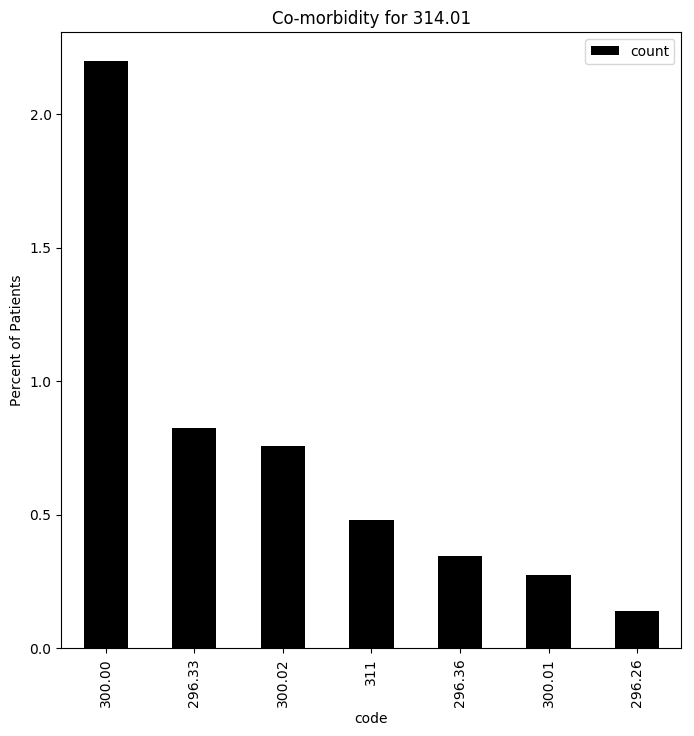

       Diag 1                                        Diag Desc 1
23533  300.02                       Generalized anxiety disorder
23572  300.01                 Panic disorder without agoraphobia
23945     311      Depressive disorder, not elsewhere classified
23973  300.00                         Anxiety state, unspecified
23980  296.33  Major depressive affective disorder, recurrent...


In [40]:
df_desc = df_combo[['Diag 1','Diag Desc 1']]
df_desc = df_desc.drop_duplicates(subset='Diag 1', keep='last')
given_diagnosis(df_combo, '314.01', df_desc)

In [16]:
lst_codes = df_combo['Diag 1'].astype(str)
lst_codes = lst_codes.unique()
print(lst_codes)

['305.00' '314.01' '300.02' '296.33' '298.9' '309.81' '295.70' '296.63'
 '303.92' '296.62' '300.20' '296.89' '295.32' '300.3' '296.90' '300.4'
 '309.28' '296.80' '295.64' '290.20' '296.64' '296.53' '300.00' '304.80'
 '293.0' 'V70.1' '294.10' '305.20' '290.3' '295.30' '301.13' '305.60'
 '309.0' 'V62.82' '300.01' '295.74' '300.21' '294.11' '295.73' '311'
 '296.65' '295.72' '300.23' '299.00' '296.61' '294.8' '295.34' '331.0'
 '290.42' '296.66' '290.21' '290.41' '331.82' '304.02' '295.90' '300.11'
 '300.29' '293.81' '312.30' '307.42' '309.24' '295.92' '296.60' '290.43'
 '295.33' '301.9' '290.13' '295.35' '304.03' '305.50' '304.90' '304.81'
 '294.9' '290.40' '303.93' '305.40' '295.75' '309.29' '301.4' '290.11'
 '295.80' '295.82' '295.95' '305.23' '293.83' '305.01' '309.89' '307.1'
 '296.02' '314.00' '295.62' '297.1' '296.00' '303.91' '301.83' '290.10'
 '296.99' '308.3' '304.01' '303.03' '312.34' '296.12' '296.05' '293.82'
 '295.83' '305.02' '307.51' '304.22' '292.11' '293.1' '299.80' '305.2

In [17]:
def ranking_codes(df,lst_codes, df_desc):
    
    ranking_count = []
    ranking_codes = []
    for x in lst_codes:
        df = df.loc[df['Diag 1'] == str(x)]
        count_list= []
        df_2 = df['Diag 2'].astype(str)
        df_3 = df['Diag 3'].astype(str)
        df_4 = df['Diag 4'].astype(str)
        unique = df_2.unique()[1:-1]
        for X in unique:
            count = 0
            for x in df_2:
                if X == x:
                    count +=1
            for x in df_3:
                if X == x:
                    count +=1
            for x in df_4:
                if X == x:
                    count +=1
            count_list.append(count/len(df)*100)

        together = pd.DataFrame(
        {'code': unique,
         'count': count_list
        })
        together = together.sort_values(['count'], ascending=[False])
        if together.empty:
            continue
        else:    
            ranking_codes.append(together['code'][0])
            ranking_count.append(together['count'][0])
        print (together['code'][0])
        print (together['count'][0])
    
    return (ranking_count, ranking_codes)

In [18]:
ranking_codes(df_combo, lst_codes, df_desc)
ranking_df = pd.DataFrame(
    {'code': ranking_codes,
     'count': ranking_count
    })
ranking_df = ranking_df.sort('count', ascending=False)

311
13.6094674556


NameError: name 'ranking_count' is not defined

In [ ]:
df_desc[116:]


In [19]:
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19157 entries, 274 to 23980
Data columns (total 22 columns):
Doctor_Num                19157 non-null int64
Gender Desc               19157 non-null object
Birth Dt                  19157 non-null object
Pat Age in Years          19157 non-null int64
Pat Age in Years (DOS)    19157 non-null int64
Pat Type                  19156 non-null object
Dt of Svc                 19157 non-null object
CPT4                      19157 non-null object
CPT4 Desc                 19157 non-null object
Diag 1                    19157 non-null object
Diag 2                    6261 non-null object
Diag 3                    2202 non-null object
Diag 4                    19157 non-null object
Diag Desc 1               18969 non-null object
Diag Desc 2               6190 non-null object
Diag Desc 3               2143 non-null object
Diag Desc 4               447 non-null object
Place Of Serv             19157 non-null object
Fin Class                 17399 no

In [ ]:
df_combo['Pat_Age_0_20'] = df_combo['Pat Age in Years'].apply(lambda x: 1 if x<=20 else 0)

In [ ]:
df_combo.info()


In [ ]:
df_combo['Pat_Age_0_20'].unique()

In [ ]:
df_combo['Pat_Age_0_20'].sum()

In [ ]:
df_combo['Pat_Age_21_40'] = df_combo['Pat Age in Years'].apply(lambda x: 1 if x<=40 and x>=21 else 0)

In [ ]:
df_combo['Pat_Age_21_40'].sum()

In [ ]:
df_combo['Pat_Age_41_60'] = df_combo['Pat Age in Years'].apply(lambda x: 1 if x<=60 and x>=41 else 0)

In [ ]:
df_combo['Pat_Age_41_60'].sum()

In [ ]:
df_combo['Pat_Age_61_80'] = df_combo['Pat Age in Years'].apply(lambda x: 1 if x<=80 and x>=61 else 0)

In [ ]:
df_combo['Pat_Age_61_80'].sum()

In [ ]:
df_combo['Pat_Age_81_110'] = df_combo['Pat Age in Years'].apply(lambda x: 1 if x<110 and x>=81 else 0)

In [ ]:
df_combo['Pat_Age_81_110'].sum()

In [ ]:
df_combo.info()


In [ ]:
df_combo['Gender Desc'].unique()

In [ ]:
df_age_0_20 = df_combo[df_combo["Pat Age in Years"] < 20]
df_female_0_20 = df_age_0_20[df_age_0_20["Gender Desc"] == 'Female']

In [ ]:
df_female_0_20.info()

In [32]:
df_age_0_20 = df_combo[df_combo["Pat Age in Years"] < 20]
df_age_21_40 = df_combo[df_combo['Pat Age in Years'].between(21, 40, inclusive=True)]
df_age_41_60 = df_combo[df_combo['Pat Age in Years'].between(41, 60, inclusive=True)]
df_age_61_80 = df_combo[df_combo['Pat Age in Years'].between(61, 80, inclusive=True)]
df_age_81_110 = df_combo[df_combo['Pat Age in Years'].between(81, 110, inclusive=True)]

df_female_0_20 = df_age_0_20[df_age_0_20["Gender Desc"] == 'Female']
df_female_21_40 = df_age_21_40[df_age_21_40["Gender Desc"] == 'Female']
df_female_41_60 = df_age_41_60[df_age_41_60["Gender Desc"] == 'Female']
df_female_61_80 = df_age_61_80[df_age_61_80["Gender Desc"] == 'Female']
df_female_81_110 = df_age_81_110[df_age_81_110["Gender Desc"] == 'Female']

df_male_0_20 = df_age_0_20[df_age_0_20["Gender Desc"] == 'Male']
df_male_21_40 = df_age_21_40[df_age_21_40["Gender Desc"] == 'Male']
df_male_41_60 = df_age_41_60[df_age_41_60["Gender Desc"] == 'Male']
df_male_61_80 = df_age_61_80[df_age_61_80["Gender Desc"] == 'Male']

df_female = df_combo[df_combo["Gender Desc"] == 'Female']
df_male = df_combo[df_combo["Gender Desc"] == 'Male']

In [ ]:
df_male_21_40.info()

In [ ]:
df_male_41_60.info()

In [ ]:
df_male_61_80.info()

In [ ]:
df_doc = df_combo[df_combo['Doctor_Num'] == 4]

In [ ]:
df_doc.info()

In [ ]:
df = df_combo.loc[df_combo['Diag 1'] == '296.23']
doc_list = [1,2,3,4,5,6,7,8,9,10,11]

for x in doc_list:
    df = df[df['Doctor_Num'] == x]
    if df.dropna().empty == True:
        continue
    else:
        count_list= []
        df_2 = df['Diag 2'].astype(str)
        df_3 = df['Diag 3'].astype(str)
        df_4 = df['Diag 4'].astype(str)
        unique = df_2.unique()
        index = np.argwhere(unique =='nan')
        unique = np.delete(unique, index)
        for X in unique:
            count = 0
            for x in df_2:
                if X == x:
                    count +=1
            for x in df_3:
                if X == x:
                    count +=1
            for x in df_4:
                if X == x:
                    count +=1
            count_list.append(count/len(df)*100)

        together = pd.DataFrame(
        {'code': unique,
         'count': count_list
        })

In [20]:
together.info()

NameError: name 'together' is not defined

In [21]:
df_combo['Diag 1'].value_counts()

296.33    6500
314.01    1456
300.02    1232
296.53    1174
296.89    1013
296.80    1003
300.00     968
296.90     831
296.63     643
295.70     358
305.00     338
290.20     297
295.74     232
296.64     197
295.72     193
311        187
294.11     186
309.81     185
295.32     154
300.01     136
300.3      136
290.42     124
298.9      118
295.34     108
296.65     105
295.73      81
296.62      78
300.21      63
294.8       61
331.0       61
          ... 
309.21       1
298.8        1
307.1        1
292.12       1
303.03       1
295.64       1
290.11       1
309.29       1
292.84       1
295.83       1
293.82       1
291.2        1
312.9        1
304.22       1
301.83       1
307.51       1
317          1
295.22       1
304.81       1
308.3        1
305.22       1
295.62       1
305.23       1
300.20       1
314.1        1
296.02       1
290.10       1
305.60       1
296.15       1
296.12       1
Name: Diag 1, dtype: int64

In [22]:
df_desc[df_desc['Diag 1 Desc'] == '314.01']

KeyError: 'Diag 1 Desc'

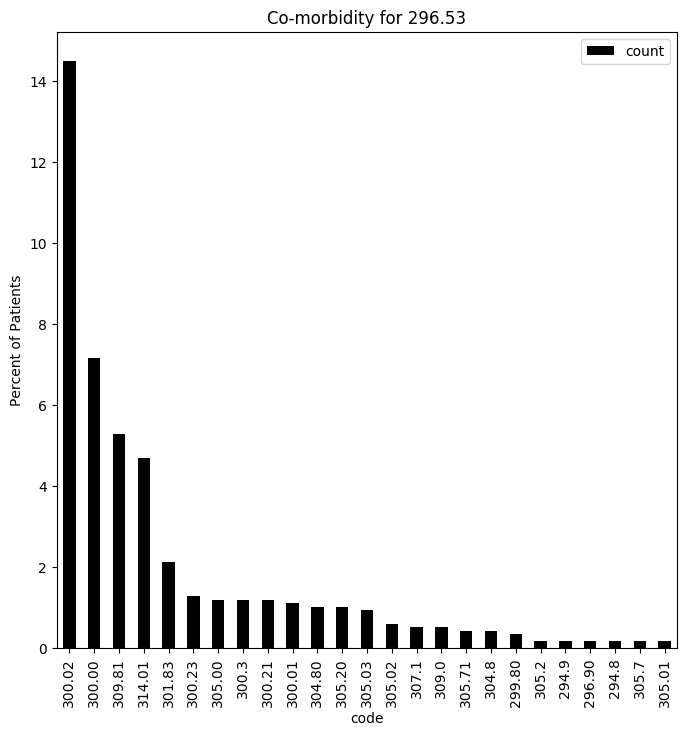

       Diag 1                                        Diag Desc 1
3350    307.1                                   Anorexia nervosa
9377   305.20       Nondependent cannabis abuse, unspecified use
19772  301.83                    Borderline personality disorder
21752  305.01  Nondependent alcohol abuse, continuous drinkin...
14742  299.80  Other specified pervasive developmental disord...
19836   294.9  Unspecified persistent mental disorders due to...
4874   304.80  Combinations of drug dependence excluding opio...
13438   309.0            Adjustment disorder with depressed mood
16036  300.21                    Agoraphobia with panic disorder
17294  300.23                                      Social phobia
20056   294.8  Other persistent mental disorders due to condi...
21729  305.02  Nondependent alcohol abuse, episodic drinking ...
21953  305.00  Other and unspecified alcohol dependence, unsp...
23533  300.02                       Generalized anxiety disorder
23572  300.01            

In [28]:
given_diagnosis(df_combo,'296.53', df_desc)

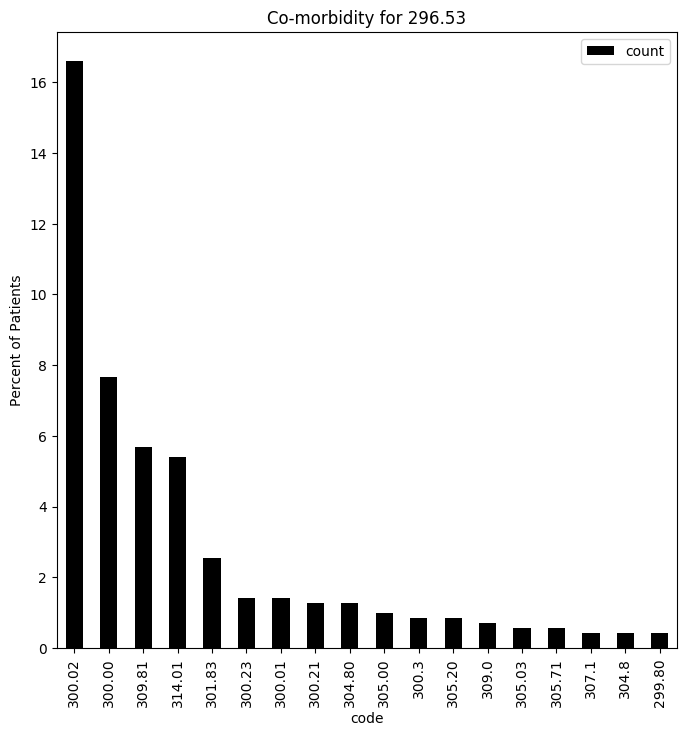

       Diag 1                                        Diag Desc 1
3350    307.1                                   Anorexia nervosa
9377   305.20       Nondependent cannabis abuse, unspecified use
19772  301.83                    Borderline personality disorder
14742  299.80  Other specified pervasive developmental disord...
4874   304.80  Combinations of drug dependence excluding opio...
13438   309.0            Adjustment disorder with depressed mood
16036  300.21                    Agoraphobia with panic disorder
17294  300.23                                      Social phobia
21953  305.00  Other and unspecified alcohol dependence, unsp...
23533  300.02                       Generalized anxiety disorder
23572  300.01                 Panic disorder without agoraphobia
23968  309.81                      Posttraumatic stress disorder
23972  314.01  Attention deficit disorder of childhood with h...
23973  300.00                         Anxiety state, unspecified
23977   300.3            

In [33]:
given_diagnosis(df_female,'296.53', df_desc)


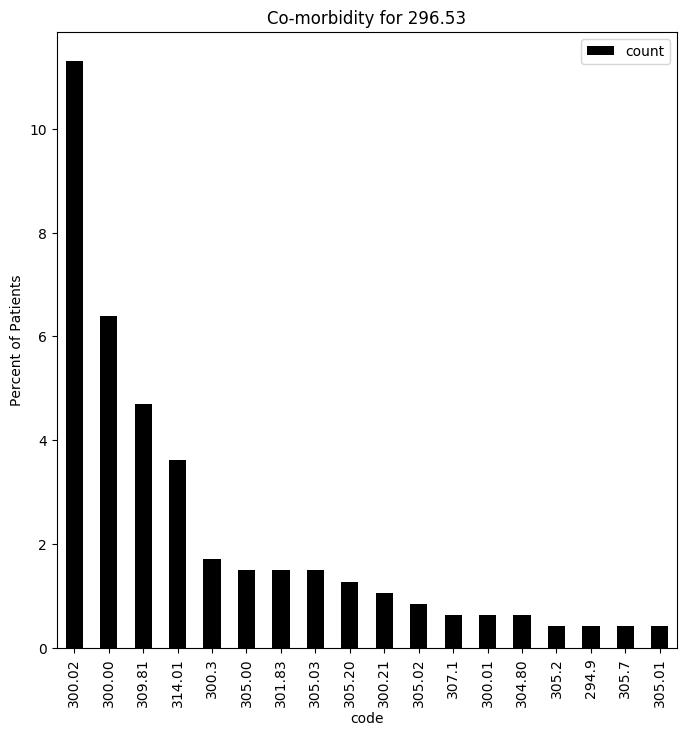

       Diag 1                                        Diag Desc 1
3350    307.1                                   Anorexia nervosa
9377   305.20       Nondependent cannabis abuse, unspecified use
19772  301.83                    Borderline personality disorder
21752  305.01  Nondependent alcohol abuse, continuous drinkin...
19836   294.9  Unspecified persistent mental disorders due to...
4874   304.80  Combinations of drug dependence excluding opio...
16036  300.21                    Agoraphobia with panic disorder
21729  305.02  Nondependent alcohol abuse, episodic drinking ...
21953  305.00  Other and unspecified alcohol dependence, unsp...
23533  300.02                       Generalized anxiety disorder
23572  300.01                 Panic disorder without agoraphobia
23968  309.81                      Posttraumatic stress disorder
23972  314.01  Attention deficit disorder of childhood with h...
23973  300.00                         Anxiety state, unspecified
23977   300.3            

In [34]:
given_diagnosis(df_male,'296.53', df_desc)

In [39]:
df_desc = df_desc[df_desc['Diag Desc 1'].str.split(',')]

KeyError: 'Diag Desc 1'

In [38]:
df_desc

2742                                [Phobia,  unspecified]
3337     [Schizophrenic disorders,  residual type,  chr...
5803        [Nondependent cocaine abuse,  unspecified use]
14523    [Dementia in conditions classified elsewhere w...
16830                        [Anxiety state,  unspecified]
21446    [Major depressive affective disorder,  recurre...
1337     [Combinations of drug dependence excluding opi...
1377       [Unspecified drug dependence,  unspecified use]
8285     [Other adjustment reactions with predominant d...
11749                   [Presenile dementia with delirium]
16792         [Nondependent cannabis abuse,  in remission]
20262               [Other specified adjustment reactions]
3350                                    [Anorexia nervosa]
3435                   [Vascular dementia,  uncomplicated]
3471     [Bipolar I disorder,  single manic episode,  m...
9377       [Nondependent cannabis abuse,  unspecified use]
9977     [Schizophrenic disorders,  residual type,  chr.